This notebook will be used to analyze and create visualizations for a dataset about sleep, health, and lifestyle of survey participants.

### Import Packages and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

health_df = pd.read_csv("shl.csv")
health_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Data Cleaning/Wrangling

In [2]:
# check dtype of each column
health_df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [3]:
# confirm that there's no null values
print(health_df.isnull().any())

Person ID                  False
Gender                     False
Age                        False
Occupation                 False
Sleep Duration             False
Quality of Sleep           False
Physical Activity Level    False
Stress Level               False
BMI Category               False
Blood Pressure             False
Heart Rate                 False
Daily Steps                False
Sleep Disorder             False
dtype: bool


In [4]:
# check what options there are for all string columns
unique_occupations = health_df['Occupation'].unique()
unique_bmi = health_df['BMI Category'].unique()
unique_sleep_disorders = health_df['Sleep Disorder'].unique()

string_cols = [unique_occupations, unique_bmi, unique_sleep_disorders]

for col in string_cols:
    print(col)

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
['Overweight' 'Normal' 'Obese' 'Normal Weight']
['None' 'Sleep Apnea' 'Insomnia']


In [5]:
# fix bmi category so "Normal" and "Normal Weight" are the same
health_df['BMI Category'] = health_df['BMI Category'].replace('Normal Weight', 'Normal')

unique_bmi = health_df['BMI Category'].unique()
print(unique_bmi)

['Overweight' 'Normal' 'Obese']


### Data Visualizations

<function matplotlib.pyplot.show(close=None, block=None)>

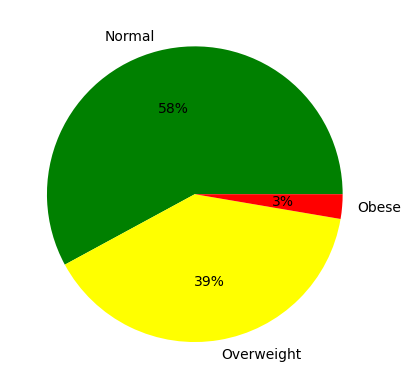

In [6]:
# get count of bmi categories 
bmi_count = health_df['BMI Category'].value_counts()

# create pie plot
plt.pie(bmi_count,
        labels = bmi_count.index,
        autopct = '%1.0f%%',
        colors = ["green", "yellow", "red"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

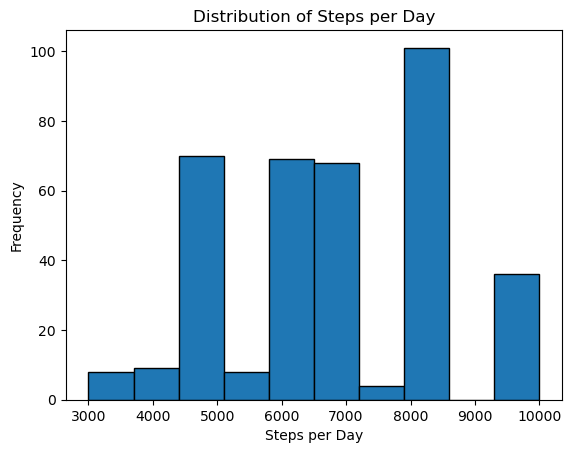

In [7]:
#create histogram
plt.hist(health_df["Daily Steps"], edgecolor = "black")
plt.xlabel("Steps per Day")
plt.ylabel("Frequency")
plt.title("Distribution of Steps per Day")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

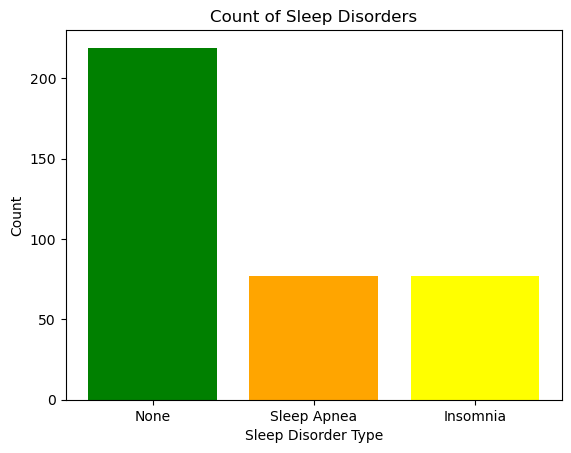

In [8]:
# get count of sleep disorders
sleep_disorder_counts = health_df['Sleep Disorder'].value_counts()

#create bar plot
plt.bar(sleep_disorder_counts.index, sleep_disorder_counts, color = ["green", "orange", "yellow"])
plt.xlabel("Sleep Disorder Type")
plt.ylabel("Count")
plt.title("Count of Sleep Disorders")
plt.show

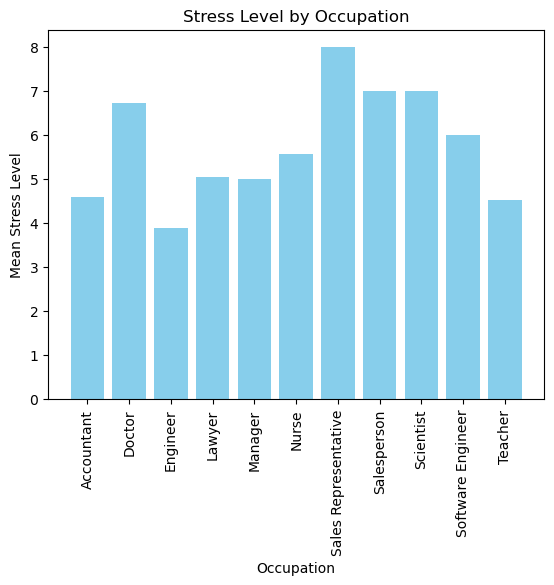

In [9]:
# calculate mean stress level for each occupation
mean_stress = health_df.groupby('Occupation')['Stress Level'].mean().reset_index()

# create bar plot
plt.bar(mean_stress['Occupation'], mean_stress['Stress Level'], color='skyblue')
plt.xlabel('Occupation')
plt.ylabel('Mean Stress Level')
plt.title('Stress Level by Occupation')
plt.xticks(rotation=90)
plt.show()

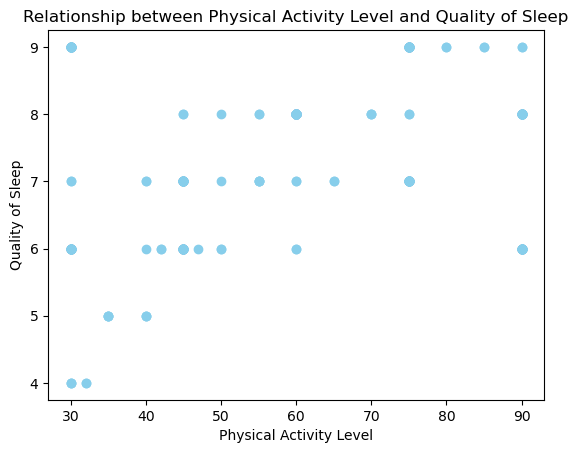

In [10]:
# create scatterplot
plt.scatter(health_df['Physical Activity Level'], health_df['Quality of Sleep'], color='skyblue')
plt.xlabel('Physical Activity Level')
plt.ylabel('Quality of Sleep')
plt.title('Relationship between Physical Activity Level and Quality of Sleep')
plt.show()

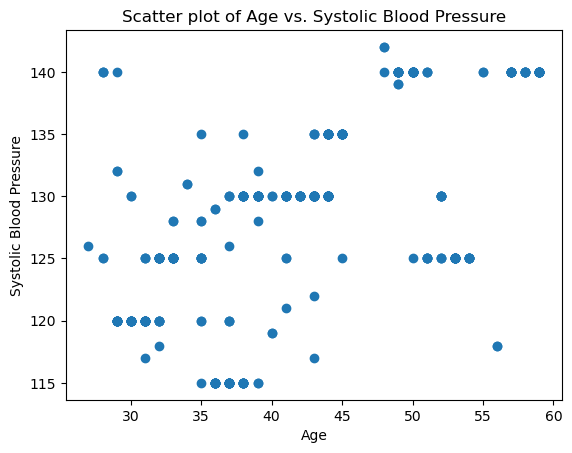

In [15]:
# Split the blood pressure column into systolic and diastolic components
health_df[["Systolic BP", "Diastolic BP"]] = health_df["Blood Pressure"].str.split("/", expand=True)

# Convert the systolic component to integer type
health_df['Systolic BP'] = health_df['Systolic BP'].astype(int)
health_df['Diastolic BP'] = health_df['Diastolic BP'].astype(int)


# Create scatterplot for age and systolic blood pressure
plt.scatter(x=health_df['Age'], y=health_df['Systolic BP'])
plt.title('Scatter plot of Age vs. Systolic Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure')
plt.show()

Based on the analysis of the dataset, three actionable pieces of advice can be derived. Firstly, the data suggests a potential correlation between physical activity level and sleep quality. Encouraging customers to engage in regular physical activity could improve their sleep quality, which in turn may positively impact their overall health and well-being. Secondly, occupations with higher mean stress levels may benefit from stress management programs or interventions. Implementing such programs could help customers cope with stress more effectively, potentially improving their overall health and reducing the risk of stress-related health issues. Lastly, collecting more detailed data on lifestyle factors such as diet, exercise habits, and mental health could provide a more comprehensive understanding of the factors influencing health and well-being. This additional data could help tailor interventions and programs more effectively to improve customer health.